In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

,location-long,location-lat
0,9.007295,47.729436
1,9.006664,47.728628
2,9.007286,47.728538
3,9.005811,47.728665
4,9.008257,47.728132


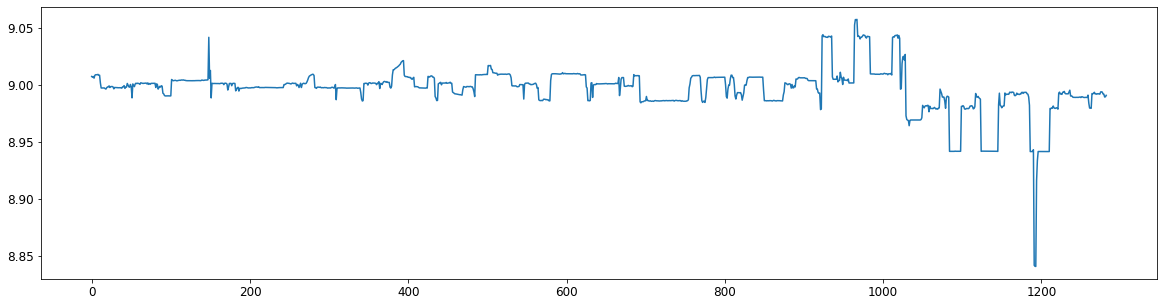

In [19]:
rawdata = pd.read_csv("./drive/MyDrive/Tutoring/SmartZoo/Lake_Constance_Ducks_XY.csv", encoding='CP949') # if you want to use another animal data, you can change this line
rawdata = rawdata.dropna()

plt.figure(figsize=(20,5))
plt.plot(range(len(rawdata)), rawdata["location-long"]) # if you want to change to Y sequence modeling, you can change to location-lat instead of location-long
rawdata.head()

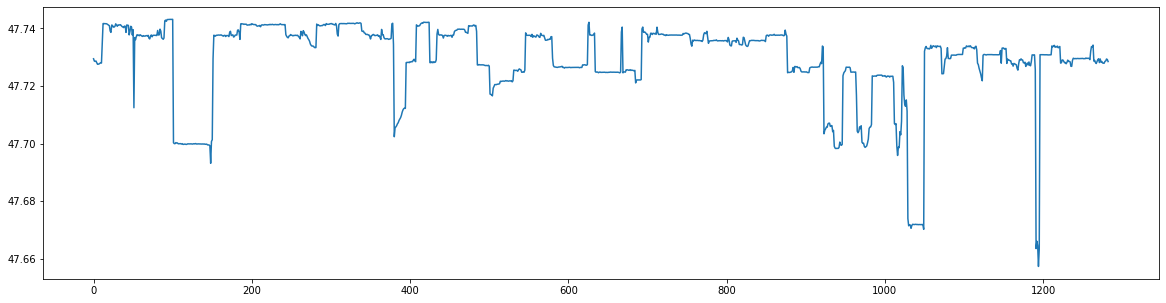

In [4]:
plt.figure(figsize=(20,5))
plt.plot(range(len(rawdata)), rawdata["location-lat"])

In [20]:
result_Y = np.load("./drive/MyDrive/Tutoring/SmartZoo/duck_Y_sequence.npy")
result_X = np.load("./drive/MyDrive/Tutoring/SmartZoo/duck_X_sequence.npy")

In [25]:
real_Y = rawdata["location-lat"].to_numpy()
#real_Y = min_max_scaler.inverse_transform(real_Y.reshape(-1,1))[:,0]

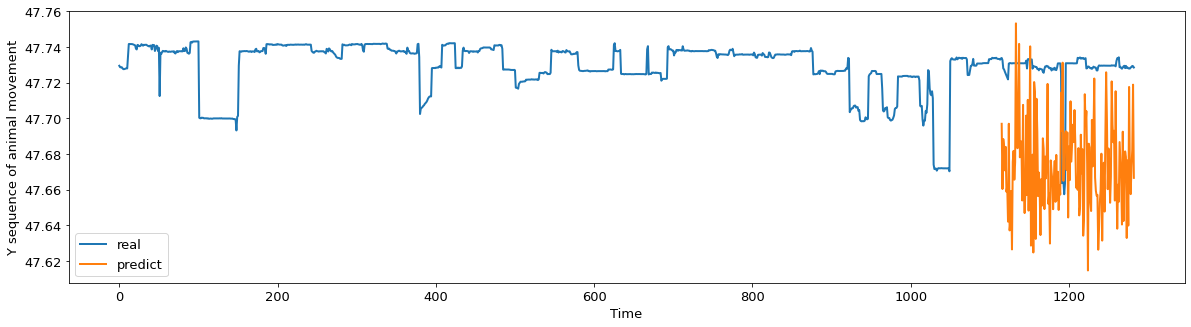

In [40]:
plt.figure(figsize=(20,5))
plt.rc('font', size=13)
plt.plot(range(0, real_Y.shape[0]), real_Y, label="real", linewidth=2)
plt.plot(range(real_Y.shape[0]-24*7, real_Y.shape[0]), result_Y, label="predict", linewidth=2)
plt.xlabel('Time')
plt.ylabel('Y sequence of animal movement')
plt.rc('axes', labelsize=14)
plt.legend()
plt.show()

In [ ]:
def MAPEval(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
MAPEval(result_Y, real_Y[-24*7:]) # 0.11797228244654398

0.11797228244654398

In [ ]:
rawdata

,location-long,location-lat
0,0.768922,0.840482
1,0.766004,0.831063
2,0.768880,0.830013
3,0.762056,0.831496
4,0.773373,0.825280
...,...,...
1301,0.697925,0.829915
1302,0.697279,0.831597
1303,0.685793,0.839519
1304,0.686601,0.837488


In [34]:
real_X = rawdata["location-long"].to_numpy()

In [35]:
real_X

array([9.0072949, 9.0066641, 9.0072859, ..., 8.9893235, 8.9894981,
       8.9907737])

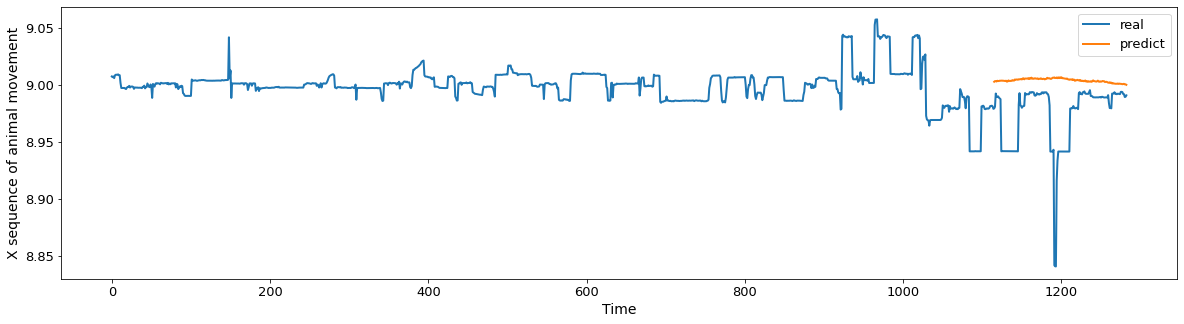

In [41]:
plt.figure(figsize=(20,5))
plt.rc('font', size=13)
plt.plot(range(0, real_X.shape[0]), real_X, label="real", linewidth=2)
plt.plot(range(real_X.shape[0]-24*7, real_X.shape[0]), result_X, label="predict", linewidth=2)
plt.xlabel('Time')
plt.ylabel('X sequence of animal movement')
plt.rc('axes', labelsize=14)
plt.legend()
plt.show()

In [ ]:
MAPEval(result_X, real_X[-24*7:]) # 0.33525151725276525

0.33525151725276525